In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, svm
from matplotlib.colors import ListedColormap

%matplotlib inline

In [26]:
#Define color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#Define function to plot iris data
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
    plt.axis('tight')
    plt.tight_layout()

In [30]:
#Load data
iris = datasets.load_iris()

#Flower combinations
Flower_comb = [[0, 1], [0, 2], [1, 2]]

#Field combinations
Field_comb = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

#Flower labels
Flower_lbl = ['Setosa', 'Versicolor', 'Virginica']

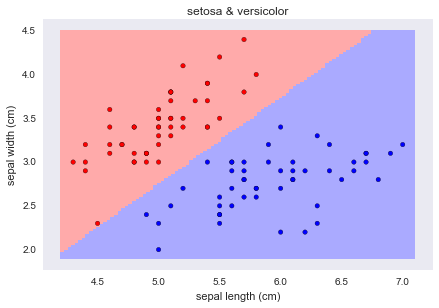

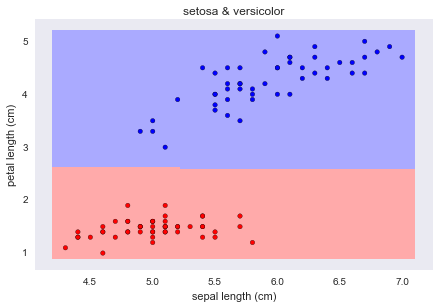

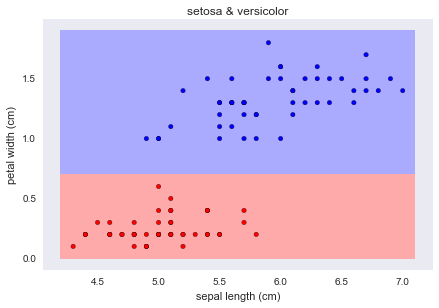

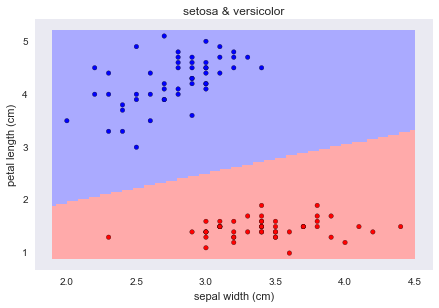

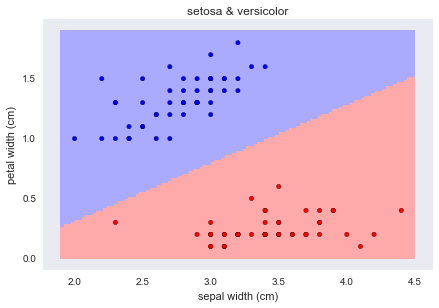

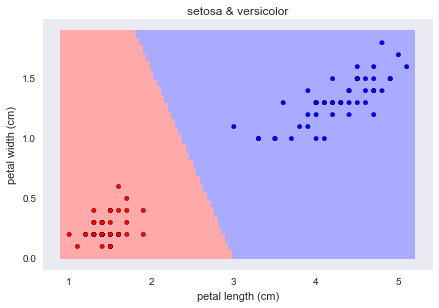

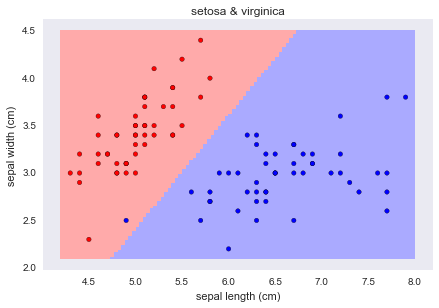

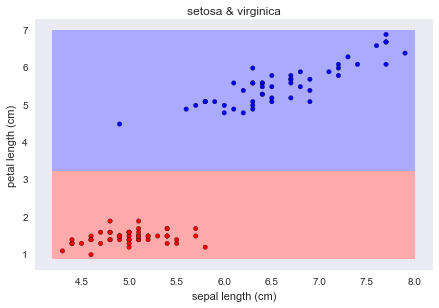

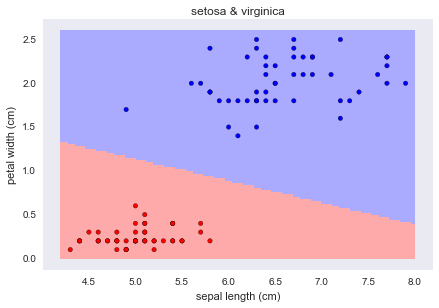

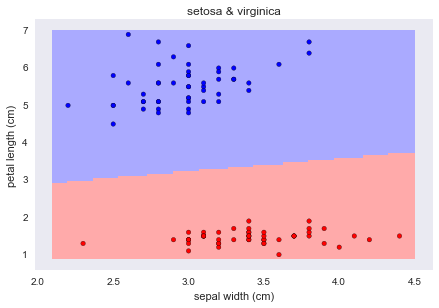

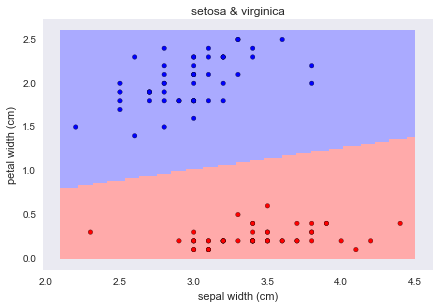

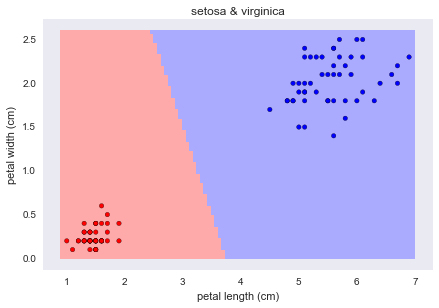

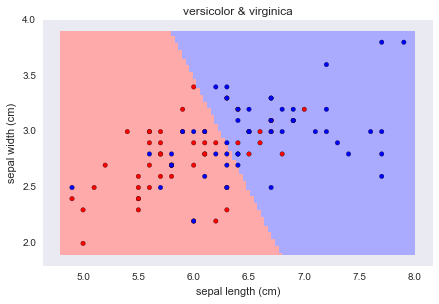

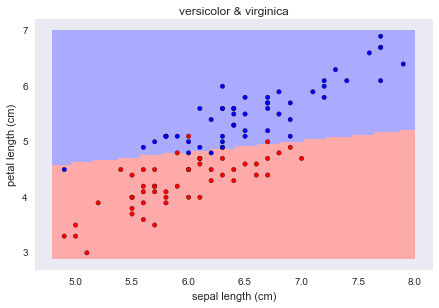

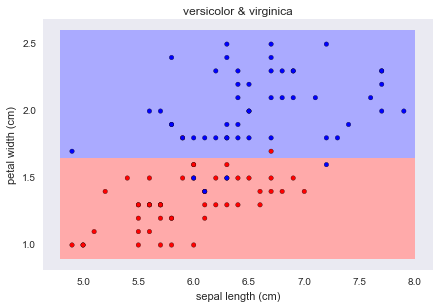

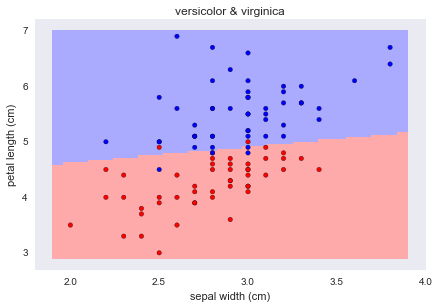

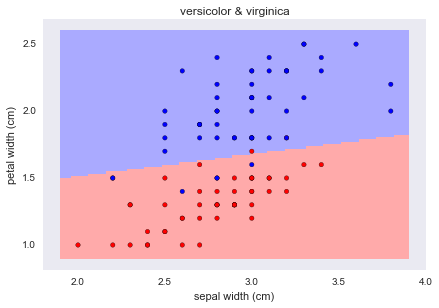

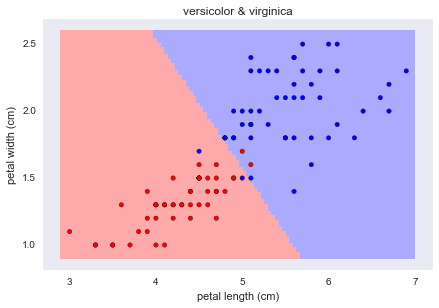

In [27]:
#Evaluate two flower types at a time
for flwr in Flower_comb:
    X = iris.data[iris.target == flwr[0]]
    X = np.append(X, iris.data[iris.target == flwr[1]], axis = 0)
    
    y = iris.target[[iris.target == flwr[0]]]
    y = np.append(y, iris.target[iris.target == flwr[1]], axis = 0)
    
    for field in Field_comb:
        svc = svm.SVC(kernel = 'linear', C = 1)
        
        plot_estimator(svc, X[:, field], y)
        
        plt.title(iris.target_names[flwr[0]] 
                  + ' & ' 
                  + iris.target_names[flwr[1]])
        plt.xlabel(iris.feature_names[field[0]])
        plt.ylabel(iris.feature_names[field[1]])

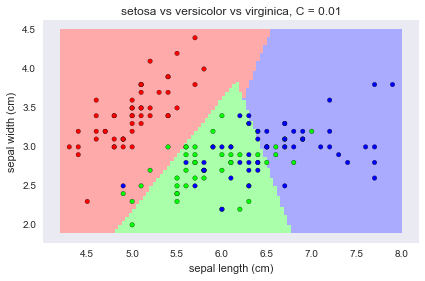

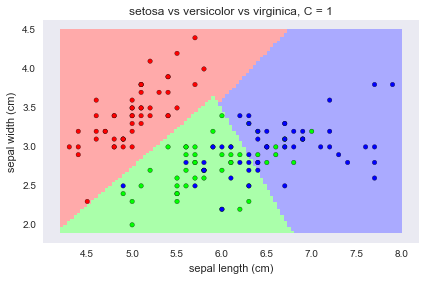

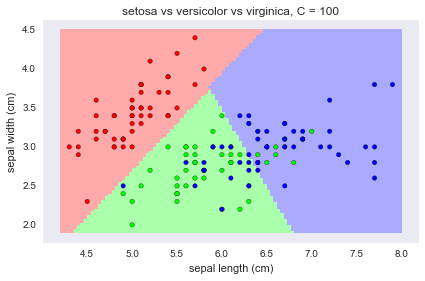

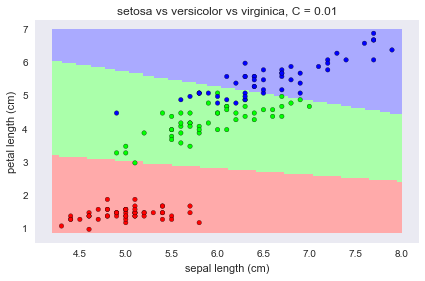

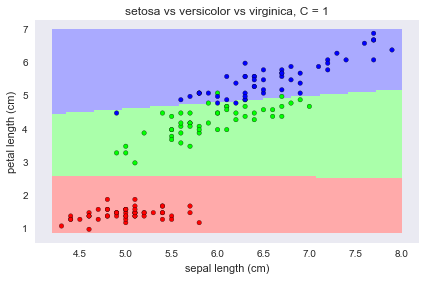

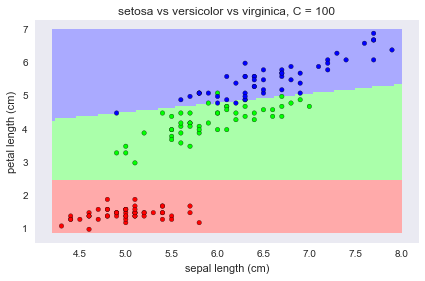

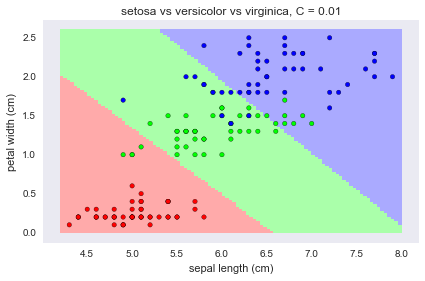

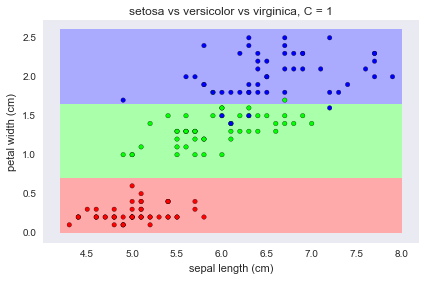

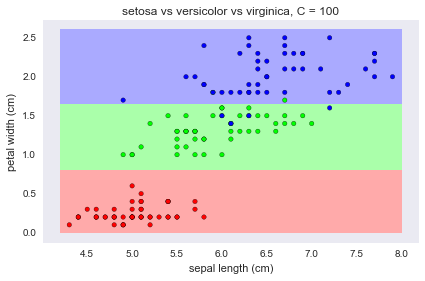

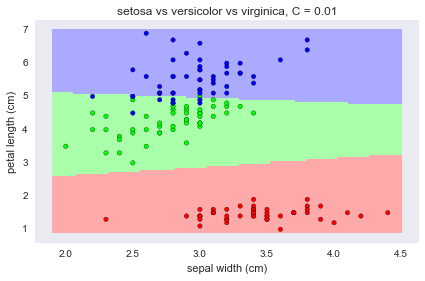

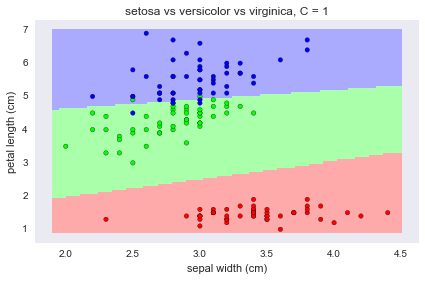

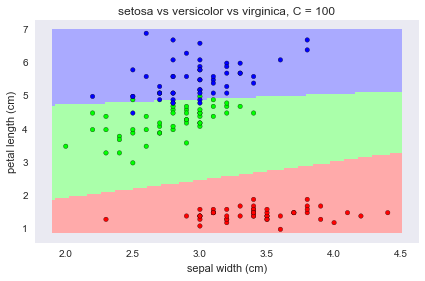

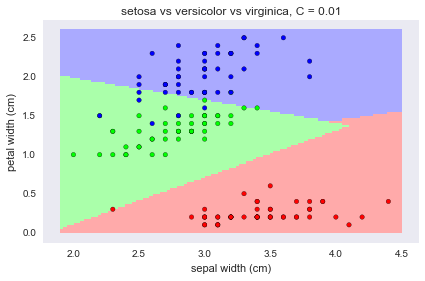

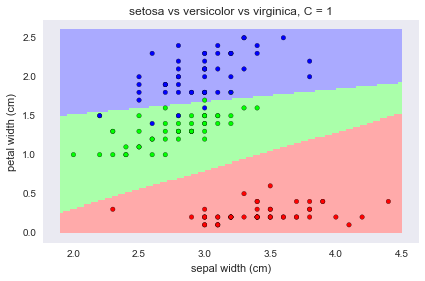

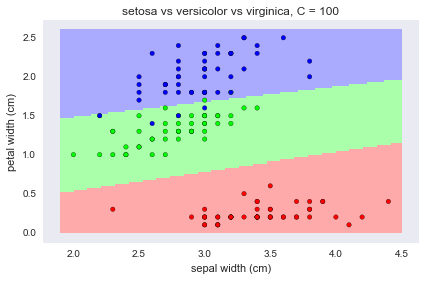

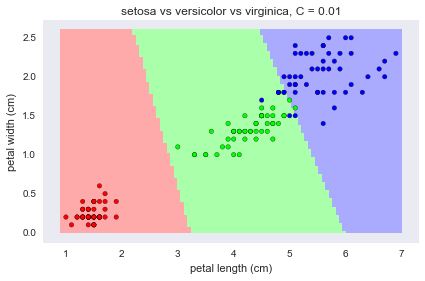

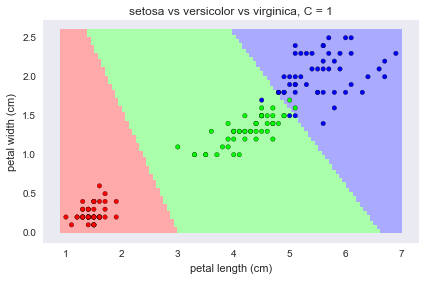

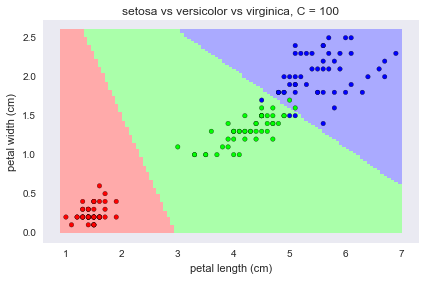

In [35]:
#Evaluate all flower types

for field in Field_comb:
    for val in [0.01, 1, 100]:
        svc = svm.SVC(kernel = 'linear', C = val)

        plot_estimator(svc, iris.data[:, field], iris.target)

        t = plt.title(' vs '.join(iris.target_names) + ', C = ' + str(val))
        plt.xlabel(iris.feature_names[field[0]])
        plt.ylabel(iris.feature_names[field[1]])
        plt.tight_layout()
    plt.savefig('Iris - SVM', bbox_extra_artists = (t, ), dpi = 100)